In [3]:
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
vgg16 = VGG16(weights='imagenet', include_top=False, 
              pooling='max', input_shape=(224, 224, 3))


vgg16.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [5]:
for model_layer in vgg16.layers:
  model_layer.trainable = False

In [6]:
def load_image(image_path):
    
    input_image = Image.open(image_path)
    resized_image = input_image.resize((224,224))
    
    return resized_image

In [7]:
def get_image_embeddings(object_image: image):
    
    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)
    
    return image_embedding

In [8]:
def get_similarity_score(artist_image: str, user_image: str):
    artist_pitch = load_image(artist_image)
    user_pitch = load_image(user_image)
    
    artist_image_vector = get_image_embeddings(artist_pitch)
    user_image_vector = get_image_embeddings(user_pitch)
    
    similarity_score = cosine_similarity(artist_image_vector, user_image_vector).reshape(1,)
    
    return similarity_score

In [9]:
def show_image(image_path):
  image = mpimg.imread(image_path)
  imgplot = plt.imshow(image)
  plt.show()

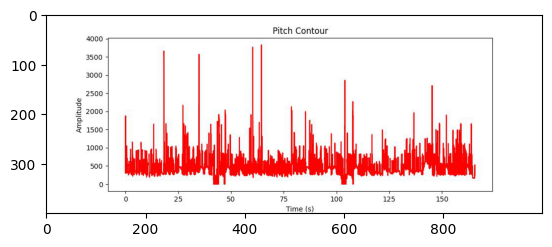

In [11]:
user_pitch_image = 'Pitch _Contour_of_user.jpg'
artist_pitch_image = 'Pitch _Contour_of_original_artist.jpg'

show_image(user_pitch_image)

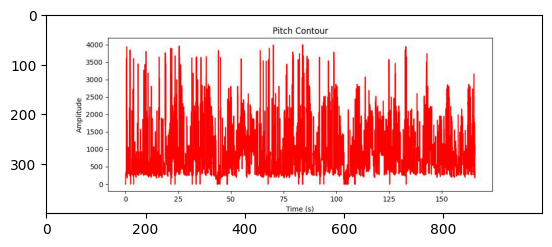

In [12]:
show_image(artist_pitch_image)

In [13]:
similarity_score = get_similarity_score(artist_pitch_image, user_pitch_image)

1/1 [==============================] - 0s 469ms/step


In [14]:
print(similarity_score[0])

0.90995765
